## 3w-asgn

by @bambooom

* 绘制一个二维随机漫步的图形
* 画出一个二次函数，同时画出梯形法求定积分时的各个梯形。
* 研究`ipywidgets`模块中的`interact`函数，绘制一个交互式的函数图形。

### 二维随机漫步图形

根据 2w 作业, 得到random walk 的一个路径 path array.

In [1]:
def RandWalk2d(m): # m steps
    r = np.sqrt(np.random.uniform(0,1,m))
    theta = np.random.uniform(0,2*np.pi,m)
    x_step = r*np.sin(theta)
    y_step = r*np.cos(theta)
    walk = np.array((x_step,y_step)).T
    walkto = np.cumsum(walk,axis=0)
    return walkto

In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

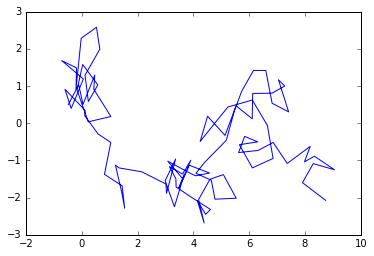

In [4]:
path1 = RandWalk2d(100) # 先假设100步, 得到 path1
plt.plot(path1[:,0],path1[:,1]); # default setting 画个line, 加分号可以避免不必要输出

尝试试多不同的步数几次, m=50,100,200,500, 然后画在同一个图上

In [5]:
Nstep=[50,100,200,500]
path=range(4)
for i in xrange(4):
    path[i]=RandWalk2d(Nstep[i])

In [6]:
path[0][0:4]

array([[ 0.01295566, -0.89280005],
       [-0.3199572 , -0.37176152],
       [-0.28595562, -0.71308468],
       [ 0.18569777, -0.96246879]])

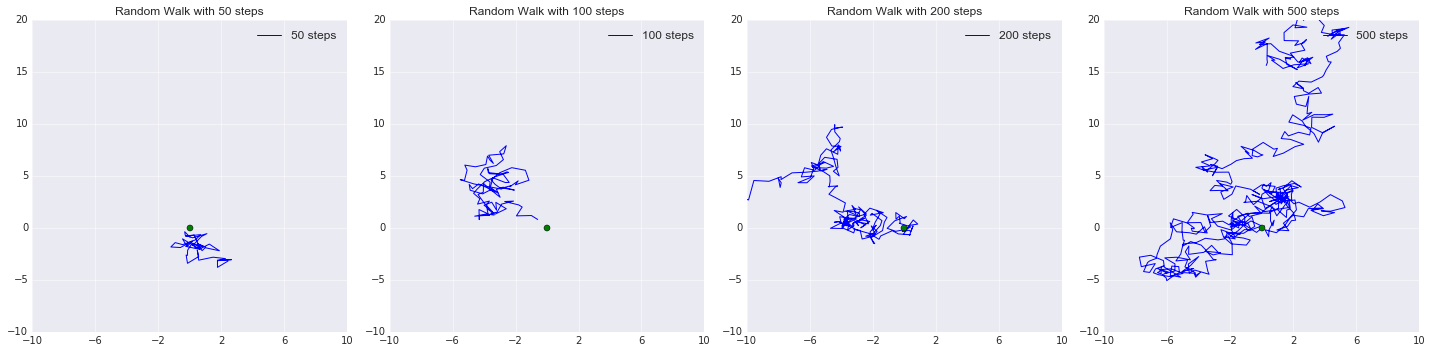

In [7]:
plt.style.use("seaborn-darkgrid") # 换一个 style
fig, axes = plt.subplots(1, 4, figsize=(20, 5)) # 1*4的画布

for n in range(4): #用循环去画
    axes[n].plot(path[n][:,0], path[n][:,1], label="%d steps"%(Nstep[n]))
    axes[n].plot([0], [0], lw=0.2, marker='o')
    axes[n].legend(loc=1) #location 1,2,3,4就是4个角
    axes[n].set_title("Random Walk with %d steps" %(Nstep[n]))
    axes[n].set_ylim(-10, 20)
    axes[n].set_yticks([-10, -5, 0, 5, 10, 15, 20])
    axes[n].set_xlim(-10, 10)
    axes[n].set_xticks([-10, -6, -2, 2, 6, 10])

fig.tight_layout()

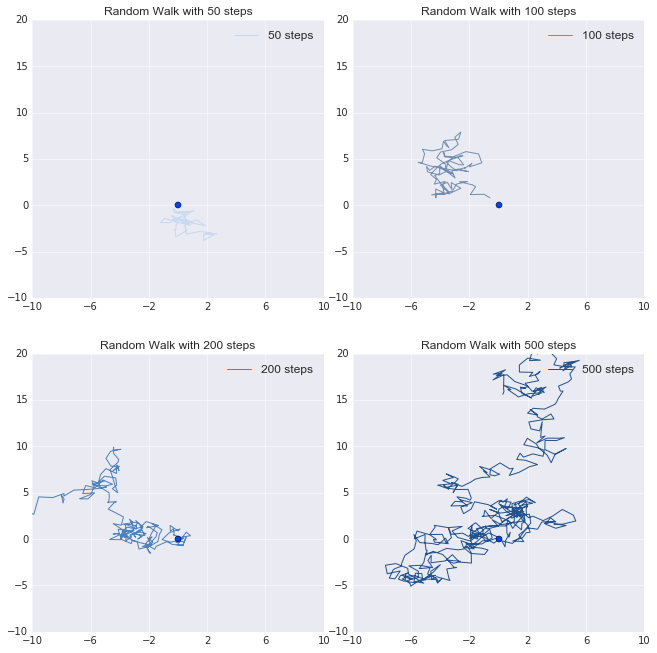

In [8]:
plt.style.use("seaborn-bright")

fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # 2*2的画布,因为觉得1*4太小

axes[0, 0].plot(path[0][:,0], path[0][:,1], label="%d steps"%(Nstep[0]), color="#C5D9F1")
axes[0, 0].set_title("Random Walk with %d steps" %(Nstep[0]))

axes[0, 1].plot(path[1][:,0], path[1][:,1], label="%d steps"%(Nstep[1]), color="#728FB2")
axes[0, 1].set_title("Random Walk with %d steps" %(Nstep[1]))

axes[1, 0].plot(path[2][:,0], path[2][:,1], label="%d steps"%(Nstep[2]), color="#4F81BD")
axes[1, 0].set_title("Random Walk with %d steps" %(Nstep[2]))

axes[1, 1].plot(path[3][:,0], path[3][:,1], label="%d steps"%(Nstep[3]), color="#23538D")
axes[1, 1].set_title("Random Walk with %d steps" %(Nstep[3]))

for m in range(2):
    for n in range(2):
        axes[m,n].plot([0], [0], lw=0.2, marker='o')
        axes[m,n].set_ylim(-10, 20)
        axes[m,n].set_yticks([-10, -5, 0, 5, 10, 15, 20])
        axes[m,n].set_xlim(-10, 10)
        axes[m,n].set_xticks([-10, -6, -2, 2, 6, 10])
        axes[m,n].legend(loc=1)

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)

尝试把4个 line 放在一个图里面.

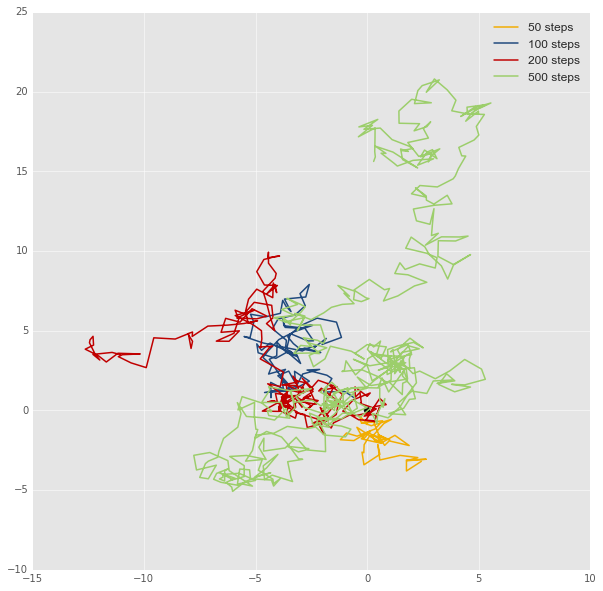

In [9]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10,10))

ax.plot([0],[0], lw=0.5, marker="o", color="black")
ax.plot(path[0][:,0], path[0][:,1], lw=1.5, label="%d steps"%(Nstep[0]), color="#F1AD02")
#ax.plot([0,path[0][-1,0]],[0,path[0][-1,1]], lw=1.5, ls="--",color="#F1AD02")
ax.plot(path[1][:,0], path[1][:,1], lw=1.5, label="%d steps"%(Nstep[1]), color="#1F497D")
ax.plot(path[2][:,0], path[2][:,1], lw=1.5, label="%d steps"%(Nstep[2]), color="#C00000")
#ax.plot([0,path[2][-1,0]],[0,path[2][-1,1]], lw=1.5, ls="--",color="#C00000")
ax.plot(path[3][:,0], path[3][:,1], lw=1.5, label="%d steps"%(Nstep[3]), color="#9CCE6B")

ax.legend(loc=0, fontsize=12, frameon=False);

### 画二次函数及梯形法
继续跟着 2w 作业

In [10]:
def f(x,a,b,c):
    return a*x**2+b*x+c

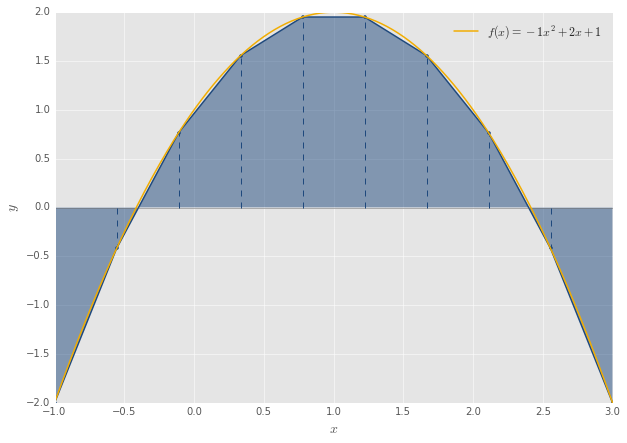

In [11]:
a = -1
b = 2
c = 1
p = -1
q = 3
N = 10
x = np.linspace(p, q, N)
y = f(x,a,b,c)

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, y, lw=1.5, color="#1F497D")
# ax.plot 画的是折线图
ax.plot(x, np.zeros_like(x), lw=0.5, color="#656565")
ax.plot([x,x],[np.zeros_like(x),y], ls='--', color="#1F497D")
ax.fill_between(x, 0, y, facecolor='#1F497D', alpha=0.5)
# shaded area 就是梯形面积, 近似等于 curve 与 x 轴之间面积, 即定积分

for i in xrange(len(x)):
    ax.plot(x[i],y[i],lw=0.3, marker='.', color="#1F497D")

from scipy.interpolate import spline
xnew = np.linspace(p,q,300)
smooth = spline(x,y,xnew)
# spline 画一个 smooth plot
ax.plot(xnew,smooth, lw=1.5, color="#F1AD02",label=r"$ \! {f(x)} = %sx^2+%sx+%c $"%(str(a),str(b),str(c)))

ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.legend(loc=0, fontsize=12, frameon=False);

### 交互式函数图形
参考[教程](https://github.com/ipython/ipywidgets/blob/master/examples/notebooks/Index.ipynb)

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [13]:
def f(x):
    return x
interact(f, x=10); # slide bar

10

In [14]:
interact(f, x=True); #checkbox

True

In [15]:
interact(f, x='Hi there!'); # textarea

u'Hi there!'

In [16]:
@interact(x=True, y=1.0) # as decorator
def g(x, y):
    return (x, y)

(True, 1.0)

In [17]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

10

In [18]:
interact(f, x=(0.0,10.0,0.01));

4.99

In [19]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    return x

5.5

In [20]:
interact(f, x=('apples','oranges')); # drop down list

u'apples'

In [21]:
interact(f, x={'one': 10, 'two': 20}); #drop down list

20

In [22]:
from IPython.utils.py3compat import annotate
@annotate(x=True)
def f(x):
    return x
interact(f);

True

In [23]:
def f(a, b):
    return a+b
w = interactive(f, a=10, b=20) # 实例

In [24]:
type(w)

ipywidgets.widgets.widget_box.Box

In [25]:
from IPython.display import display
display(w) # 实际展示 widgets

30

In [26]:
w.kwargs

{'a': 10, 'b': 20}

In [27]:
w.result

30

In [28]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if 
                str(x)==str(x)[::-1] and 
                str(x**2)==str(x**2)[::-1]))
    return

from ipywidgets import FloatSlider
#interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5))
# __manual 是指手动更新
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5),__manual=True)

<function __main__.slow_function>

In [29]:
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5,continuous_update=False))

100000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102]


<function __main__.slow_function>

In [30]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
    y_widget.observe(update_x_range, 'value') # x y 是互相dependent 的, 所以可以用 observe 更新

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget)

0.0 5.0


<function __main__.printer>

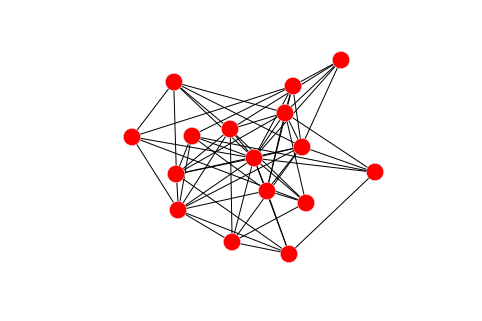

In [31]:
# example
import networkx as nx
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()
    
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
        generator={'lobster': random_lobster,
                   'power law': powerlaw_cluster,
                   'Newman-Watts-Strogatz': newman_watts_strogatz,
                   u'Erdős-Rényi': erdos_renyi,
                   });

然后就把第二题的梯形积分拿来做个交互式吧~

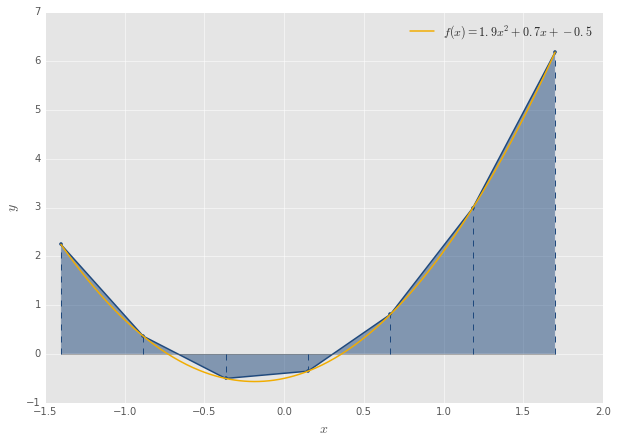

In [32]:
def f(x,a,b,c):
    return a*x**2+b*x+c

a = -1
b = 2
c = 1
p = -1
q = 3
N = 10

def trapz_plot(a,b,c,p,q,N):
    x = np.linspace(p, q, N)
    y = f(x,a,b,c)
    
    plt.style.use("ggplot")
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(x, y, lw=1.5, color="#1F497D") # ax.plot 画的是折线图
    ax.plot(x, np.zeros_like(x), lw=0.5, color="#656565")
    ax.plot([x,x],[np.zeros_like(x),y], ls='--', color="#1F497D")
    ax.fill_between(x, 0, y, facecolor='#1F497D', alpha=0.5)
    # shaded area 就是梯形面积, 近似等于 curve 与 x 轴之间面积, 即定积分
    
    for i in xrange(len(x)):
        ax.plot(x[i],y[i],lw=0.3, marker='.', color="#1F497D")
    
    from scipy.interpolate import spline
    xnew = np.linspace(p,q,300)
    smooth = spline(x,y,xnew)# spline 画一个 smooth plot
    ax.plot(xnew,smooth, lw=1.5, color="#F1AD02",label=r"$ \! {f(x)} = %sx^2+%sx+%s $"%(str(a),str(b),str(c)))

    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$y$", fontsize=14)
    ax.legend(loc=0, fontsize=12, frameon=False)
    plt.show()

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

interact(trapz_plot, a=(-5.0,5.0), b=(-5.0,5.0), c=(-5.0,5.0), p=(-5.0, 0.0),
         q=(0.0, 5.0), N=(1,100))

### 尝试用 bokeh 画图
参考[教程](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/tree/master/tutorial/)


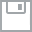
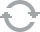
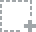
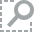
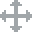
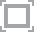
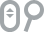
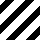
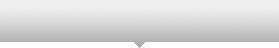
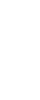
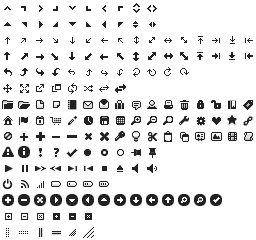
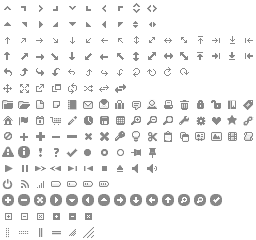
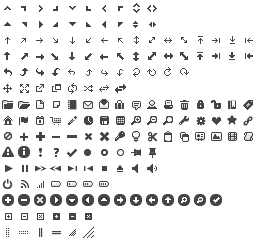
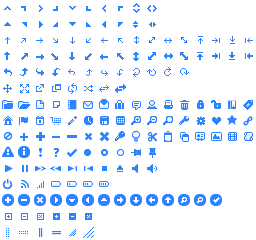
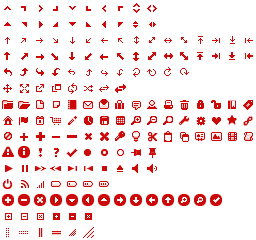
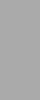
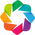
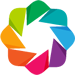

In [35]:
import numpy as np
from bokeh.plotting import figure, output_notebook, show

N = 200
path_bo=RandWalk2d(N)

output_notebook()

In [40]:
# fixed width and height
p1 = figure(title="random walks",plot_width=500, plot_height=500)
p1.line(path_bo[:,0], path_bo[:,1], color="tomato", line_width=2)
p1.circle(path_bo[:,0],path_bo[:,1], fill_color="white", size=5)
show(p1)